In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from timeit import default_timer as timer

import importlib
import utils
import networks

# change the default figure size
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams.update({'font.size': 16})

# Check how learning rate affect AWPINN and AWIPINN performance

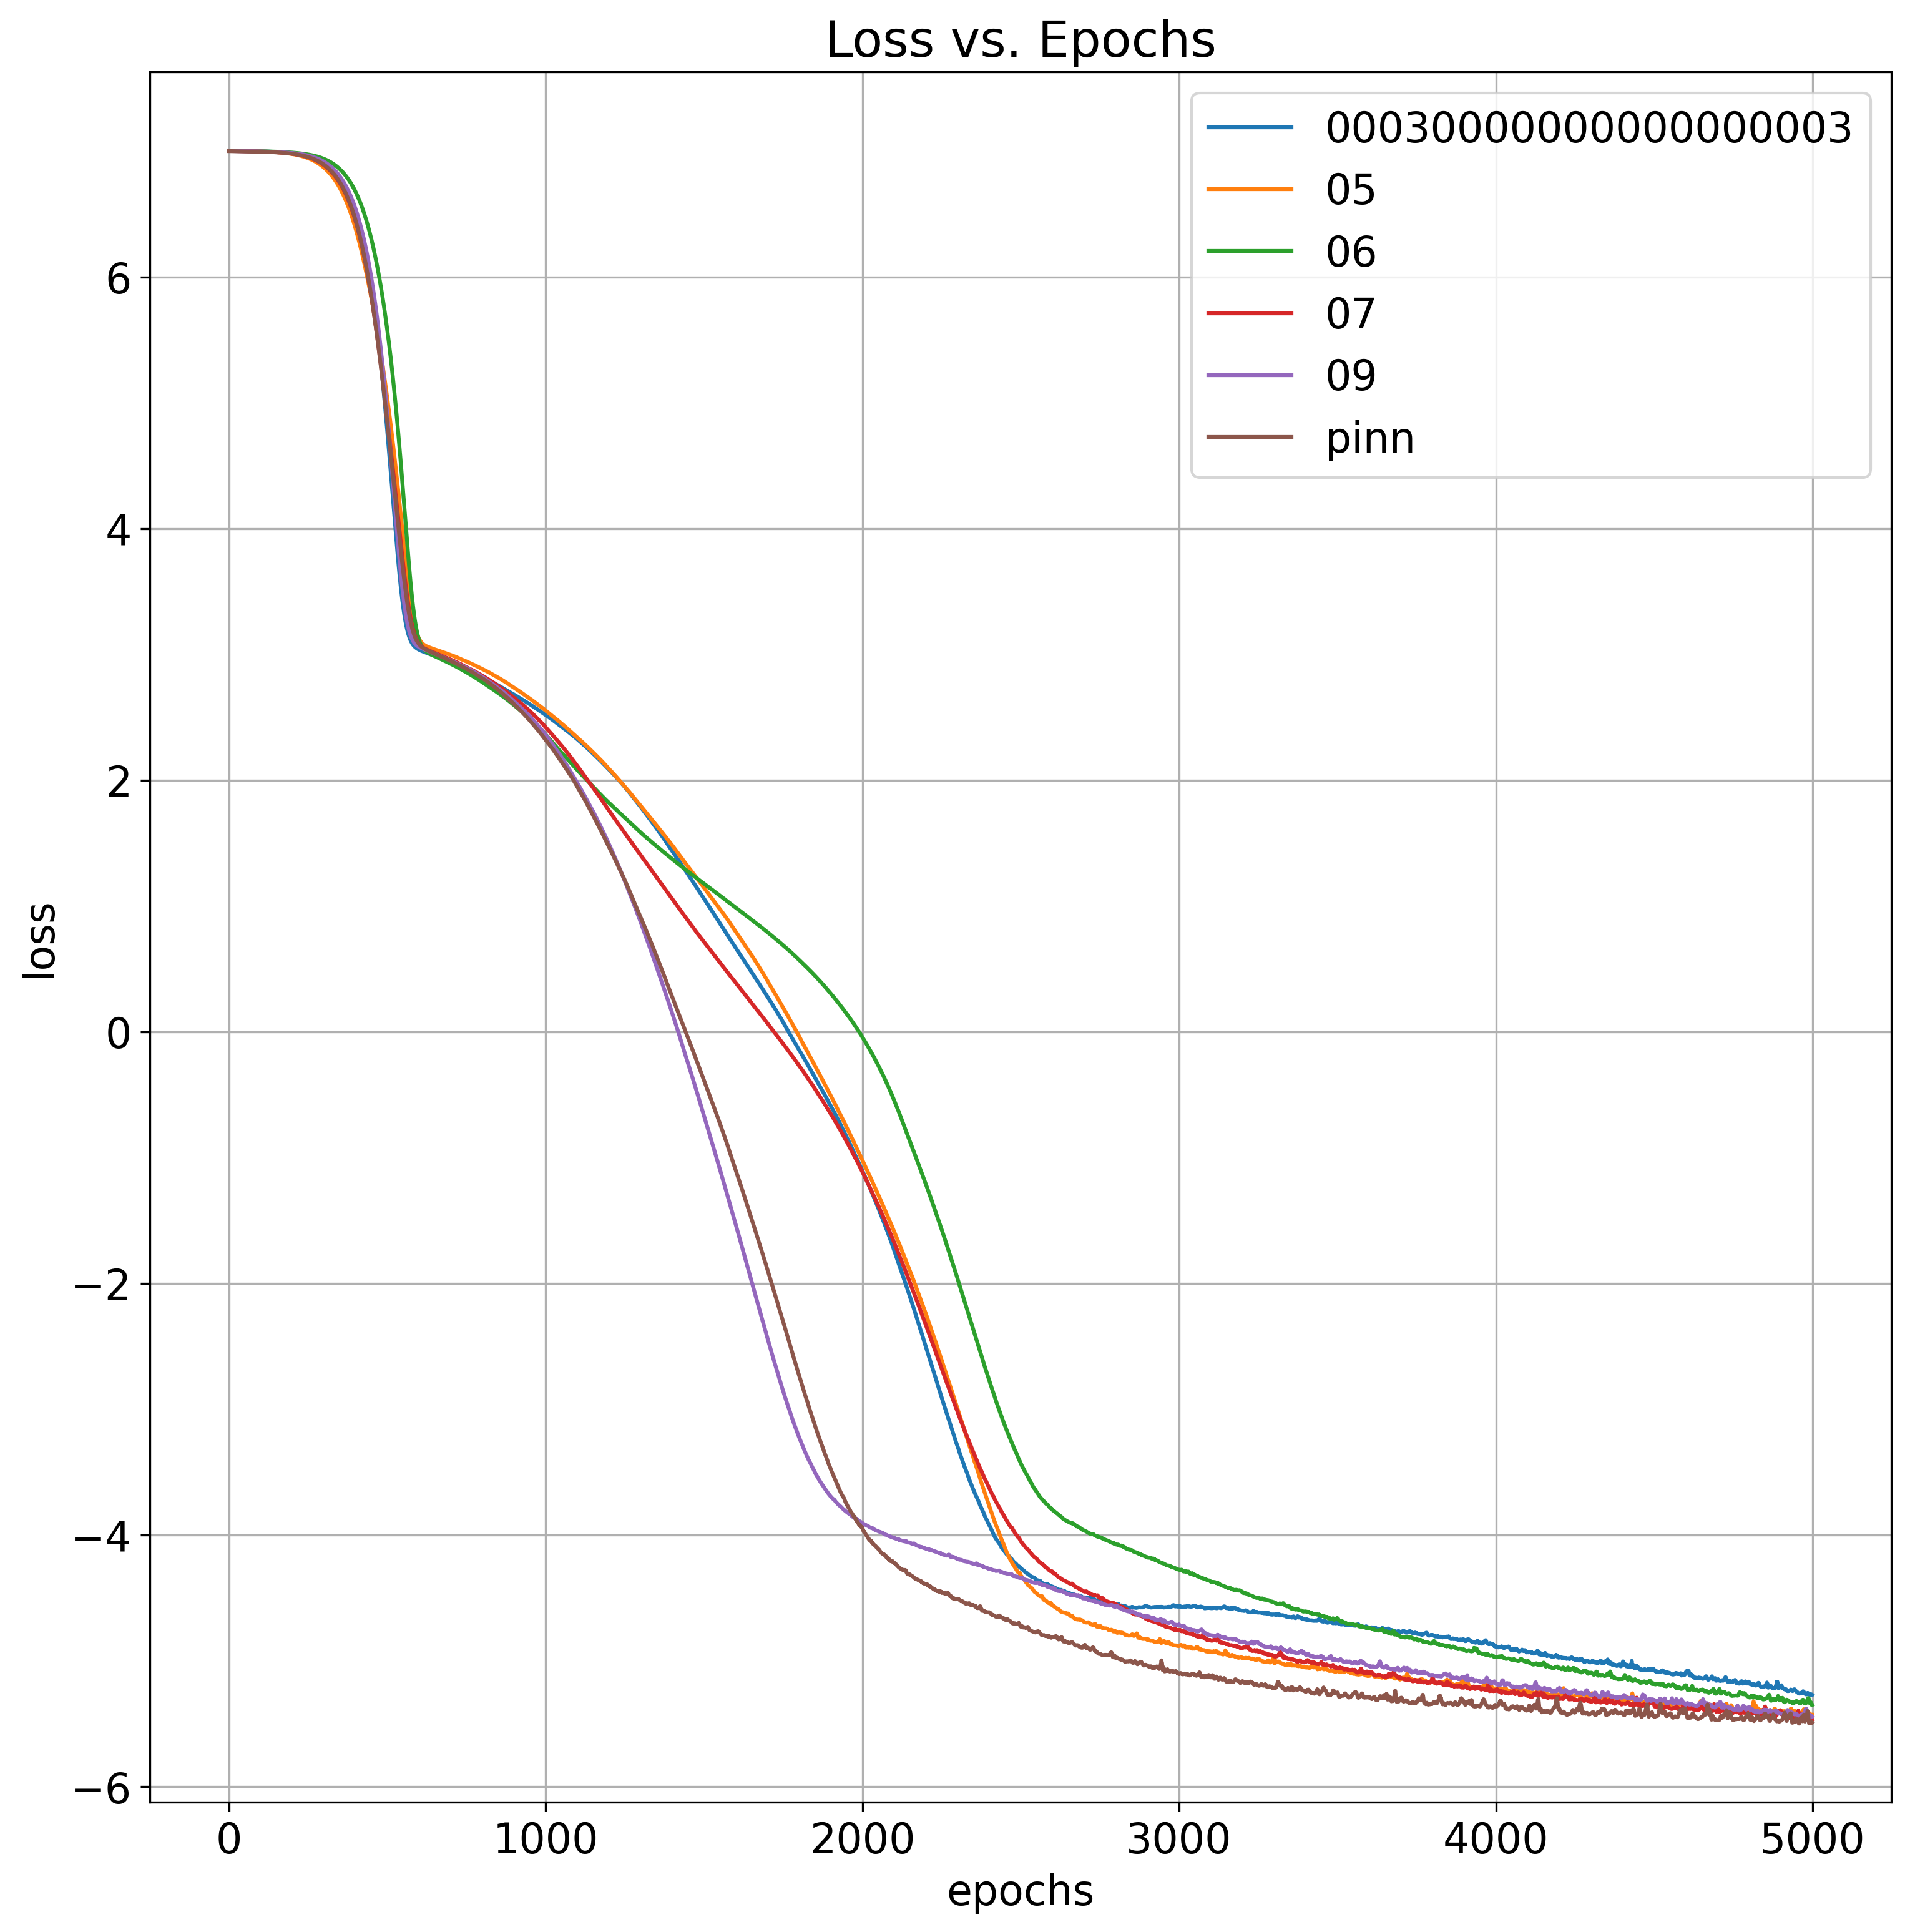

In [2]:
# extract data
loss_list = pd.read_csv('test_learning_rate/awpinn/0.003/average_loss.csv')['Average_MSE_Loss'].to_numpy()
loss_list2 = pd.read_csv('test_learning_rate/awpinn/0.00030000000000000003/average_loss.csv')['Average_MSE_Loss'].to_numpy()
loss_list3 = pd.read_csv('test_learning_rate/awpinn/3e-05/average_loss.csv')['Average_MSE_Loss'].to_numpy()
loss_list4 = pd.read_csv('test_learning_rate/awpinn/3e-06/average_loss.csv')['Average_MSE_Loss'].to_numpy()
loss_list5 = pd.read_csv('test_learning_rate/awpinn/3e-07/average_loss.csv')['Average_MSE_Loss'].to_numpy()
loss_list6 = pd.read_csv('test_learning_rate/awpinn/3e-09/average_loss.csv')['Average_MSE_Loss'].to_numpy()
loss_list7 = pd.read_csv('test_final_performance/pinn/average_loss.csv')['Average_MSE_Loss'].to_numpy()

fig = plt.figure(figsize=(12,12))
# plt.plot(range(5000), [np.log(item) for item in loss_list[:5000]], label='003')
plt.plot(range(5000), [np.log(item) for item in loss_list2[:5000]], label='00030000000000000003')
plt.plot(range(5000), [np.log(item) for item in loss_list3[:5000]], label='05')
plt.plot(range(5000), [np.log(item) for item in loss_list4[:5000]], label='06')
plt.plot(range(5000), [np.log(item) for item in loss_list5[:5000]], label='07')
plt.plot(range(5000), [np.log(item) for item in loss_list6[:5000]], label='09')
plt.plot(range(5000), [np.log(item) for item in loss_list7[:5000]], label='pinn')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title(f'Loss vs. Epochs')
plt.grid(True)

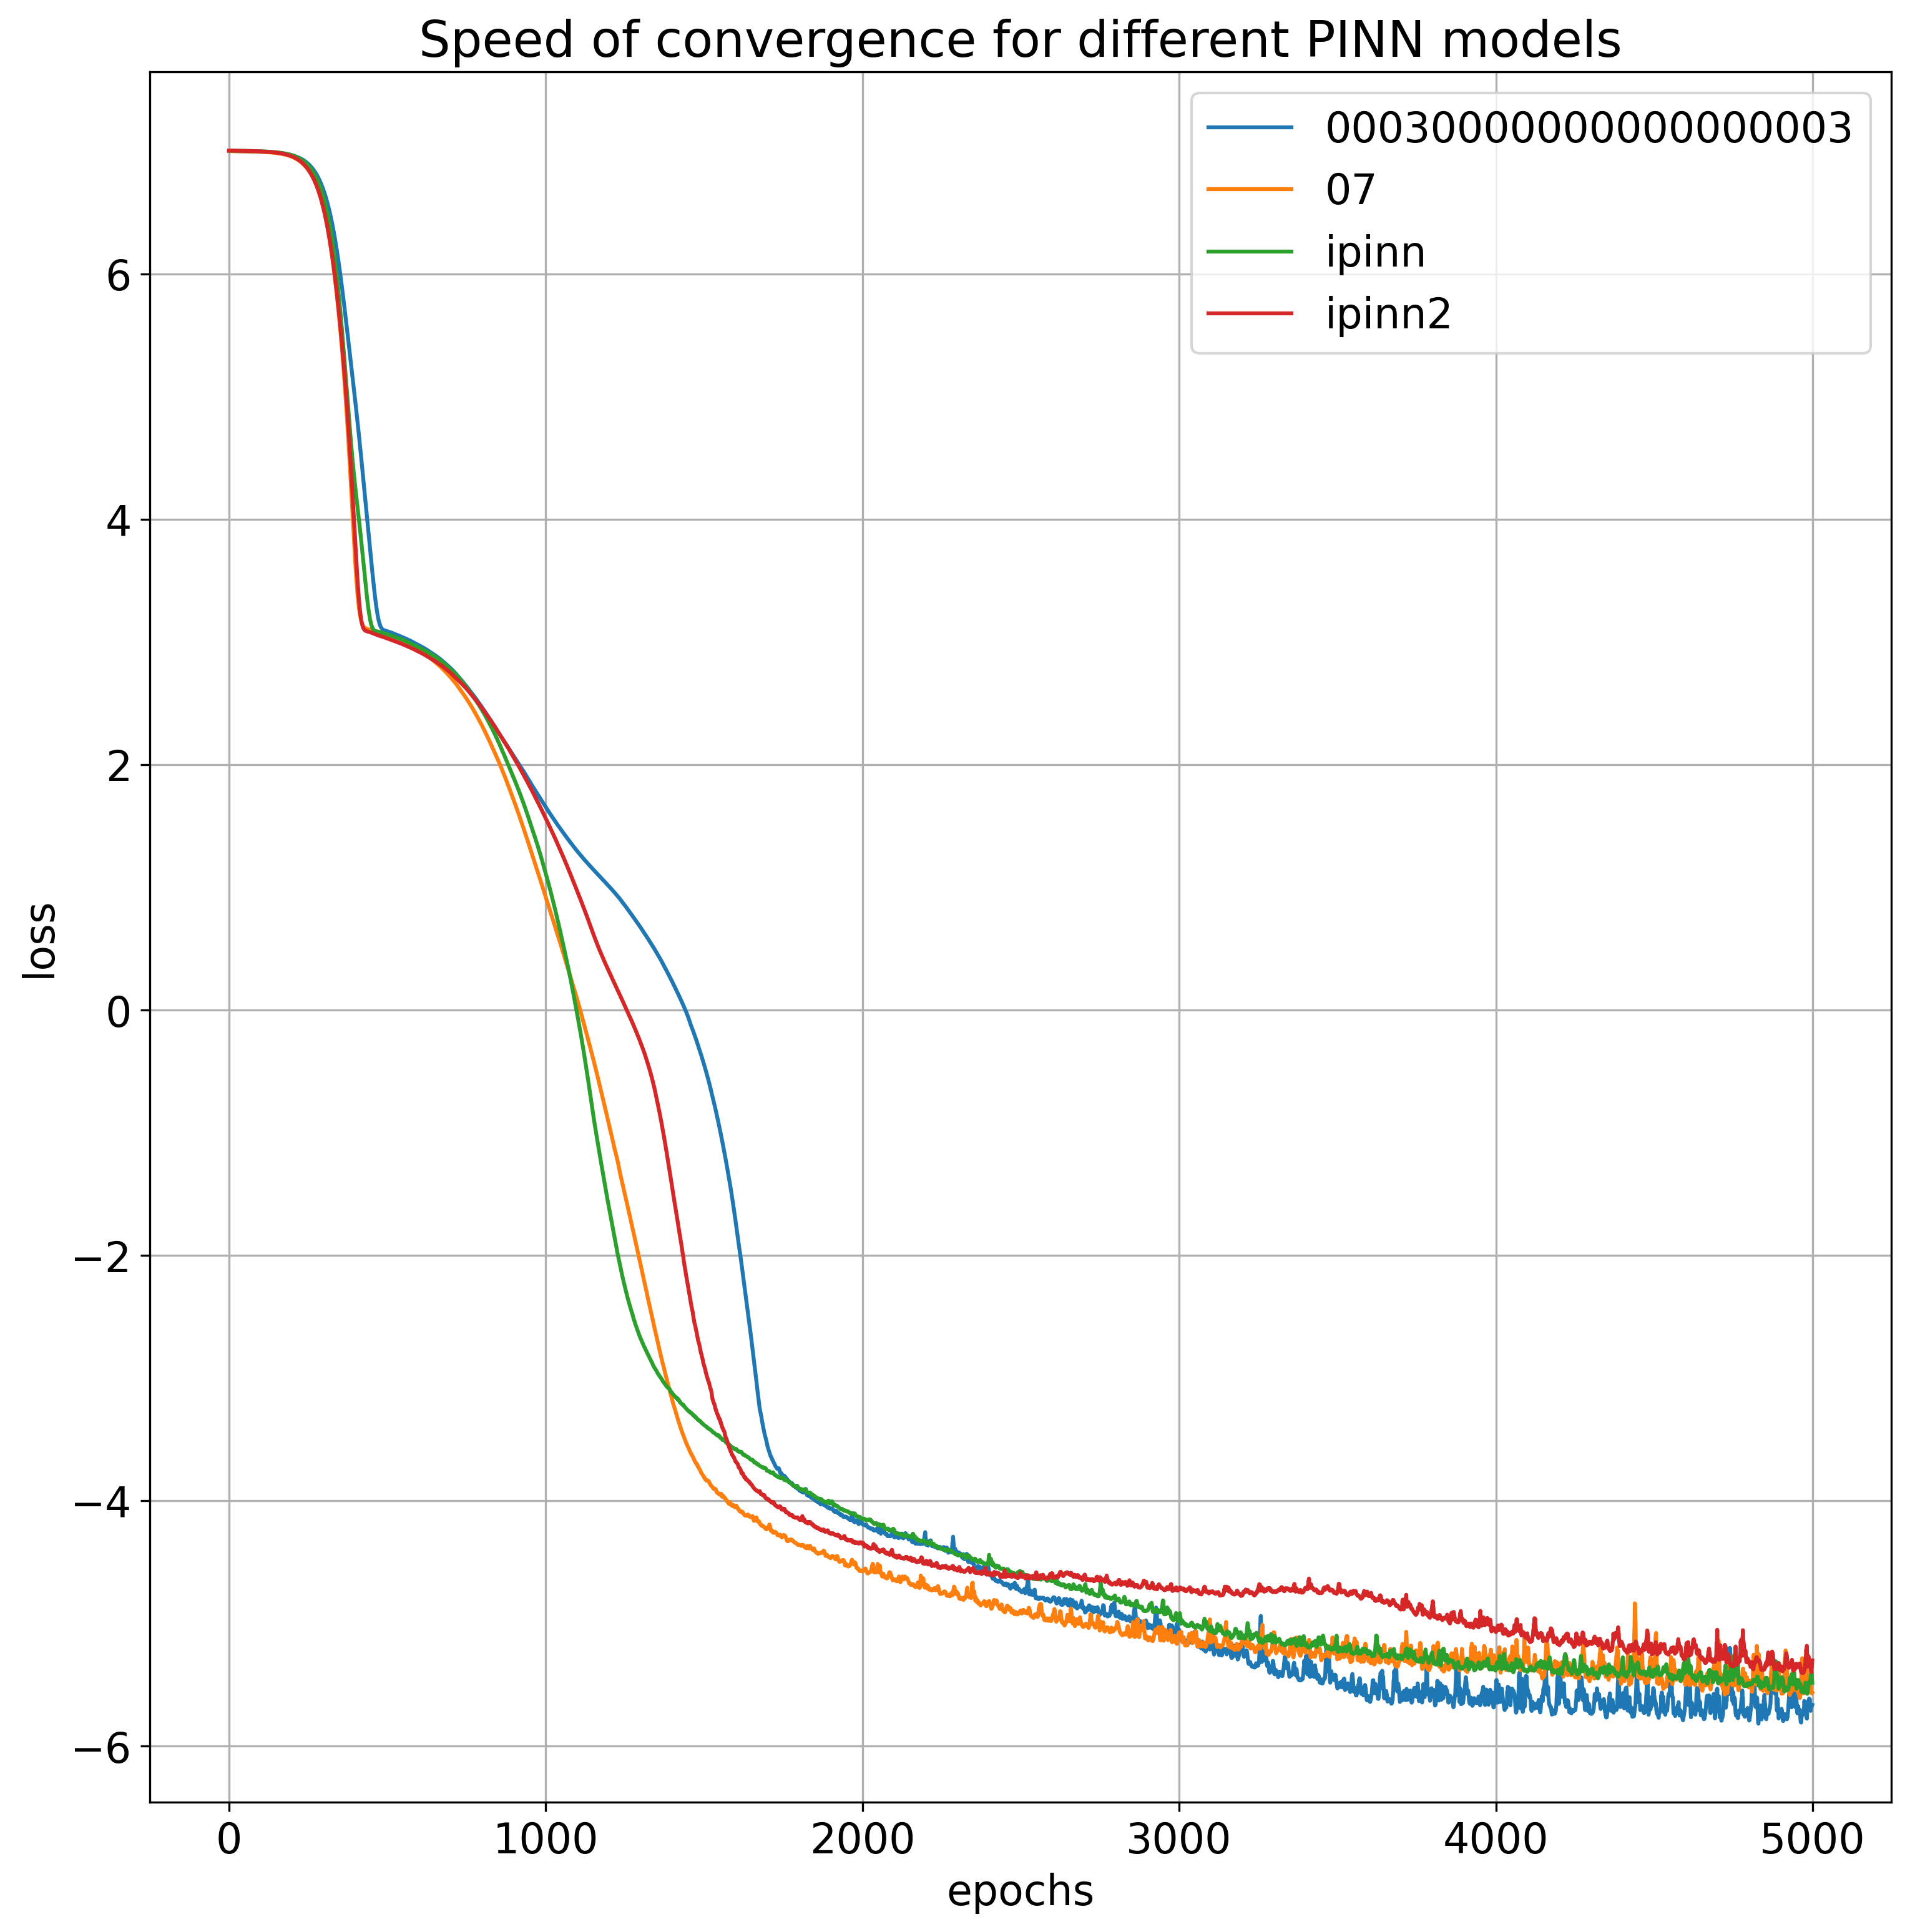

In [3]:
# extract data
loss_list = pd.read_csv('test_learning_rate/awipinn/0.003/average_loss.csv')['Average_MSE_Loss'].to_numpy()
loss_list2 = pd.read_csv('test_learning_rate/awipinn/0.00030000000000000003/average_loss.csv')['Average_MSE_Loss'].to_numpy()
loss_list3 = pd.read_csv('test_learning_rate/awipinn/3e-05/average_loss.csv')['Average_MSE_Loss'].to_numpy()
loss_list4 = pd.read_csv('test_learning_rate/awipinn/3e-06/average_loss.csv')['Average_MSE_Loss'].to_numpy()
loss_list5 = pd.read_csv('test_learning_rate/awipinn/3e-07/average_loss.csv')['Average_MSE_Loss'].to_numpy()
loss_list6 = pd.read_csv('test_learning_rate/awipinn/3e-09/average_loss.csv')['Average_MSE_Loss'].to_numpy()
loss_list7 = pd.read_csv('test_final_performance/ipinn/average_loss.csv')['Average_MSE_Loss'].to_numpy()
loss_list8 = pd.read_csv('test_final_performance/ipinn/ipinn_average_lossesv1.csv')['Average_MSE_Loss'].to_numpy()
loss_list9 = pd.read_csv('test_final_performance/pinn/average_loss.csv')['Average_MSE_Loss'].to_numpy()

# print('Done')
# print(loss_list.shape)
# print(loss_list2.shape)
# print(loss_list3.shape)
# print(loss_list4.shape)
# print(loss_list5.shape)
# print(loss_list6.shape)
# print(loss_list7.shape)

fig = plt.figure(figsize=(12,12))
# plt.plot(range(5000), [np.log(item) for item in loss_list[:5000]], label='003')
plt.plot(range(5000), [np.log(item) for item in loss_list2[:5000]], label='00030000000000000003')
# plt.plot(range(5000), [np.log(item) for item in loss_list3[:5000]], label='05')
# plt.plot(range(5000), [np.log(item) for item in loss_list4[:5000]], label='06')
plt.plot(range(5000), [np.log(item) for item in loss_list5[:5000]], label='07')
# plt.plot(range(5000), [np.log(item) for item in loss_list6[:5000]], label='09')
plt.plot(range(5000), [np.log(item) for item in loss_list7[:5000]], label='ipinn')
plt.plot(range(5000), [np.log(item) for item in loss_list8[:5000]], label='ipinn2')
# plt.plot(range(5000), [np.log(item) for item in loss_list9[:5000]], label='pinn2')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title(f'Speed of convergence for different PINN models')
plt.grid(True)
plt.savefig('test_loss_weights/plot/PINN Training Losses for Different Weight Combinations.png', bbox_inches='tight')

# Compare AWIPINN, IPINN, AWPINN and PINN

In [18]:
# extract data
loss_list = pd.read_csv('test_final_performance/pinn/average_loss.csv')['Average_MSE_Loss'].to_numpy()
# .to_numpy()
loss_list2 = pd.read_csv('test_final_performance/ipinn/average_loss.csv')['Average_MSE_Loss'].to_numpy()
loss_list4 = pd.read_csv('test_initial_loss/awpinn/0.001/average_loss.csv')['Average_MSE_Loss'].to_numpy()
loss_list5 = pd.read_csv('test_initial_loss/awipinn/0.001/average_loss.csv')['Average_MSE_Loss'].to_numpy()
# loss_list4 = pd.read_csv('test_final_performance/awpinn/average_loss.csv')['Average_MSE_Loss'].to_numpy()
# loss_list5 = pd.read_csv('test_final_performance/awipinn/average_loss.csv')['Average_MSE_Loss'].to_numpy()
# loss_list3 = pd.read_csv('test_learning_rate/awipinn/lr-10/awipinn_average_losses_1.csv')['Average_MSE_Loss'].to_numpy()
# loss_list6 = pd.read_csv('test_final_performance/ipinn/ipinn_average_lossesv1.csv')['Average_MSE_Loss'].to_numpy()
# loss_list7 = pd.read_csv('test_final_performance/awpinn/awpinn_average_losses_1.csv')['Average_MSE_Loss'].to_numpy()
# print('Done')
# print(loss_list.shape)
# print(loss_list2.shape)
# print(loss_list4.shape)
# print(loss_list5.shape)

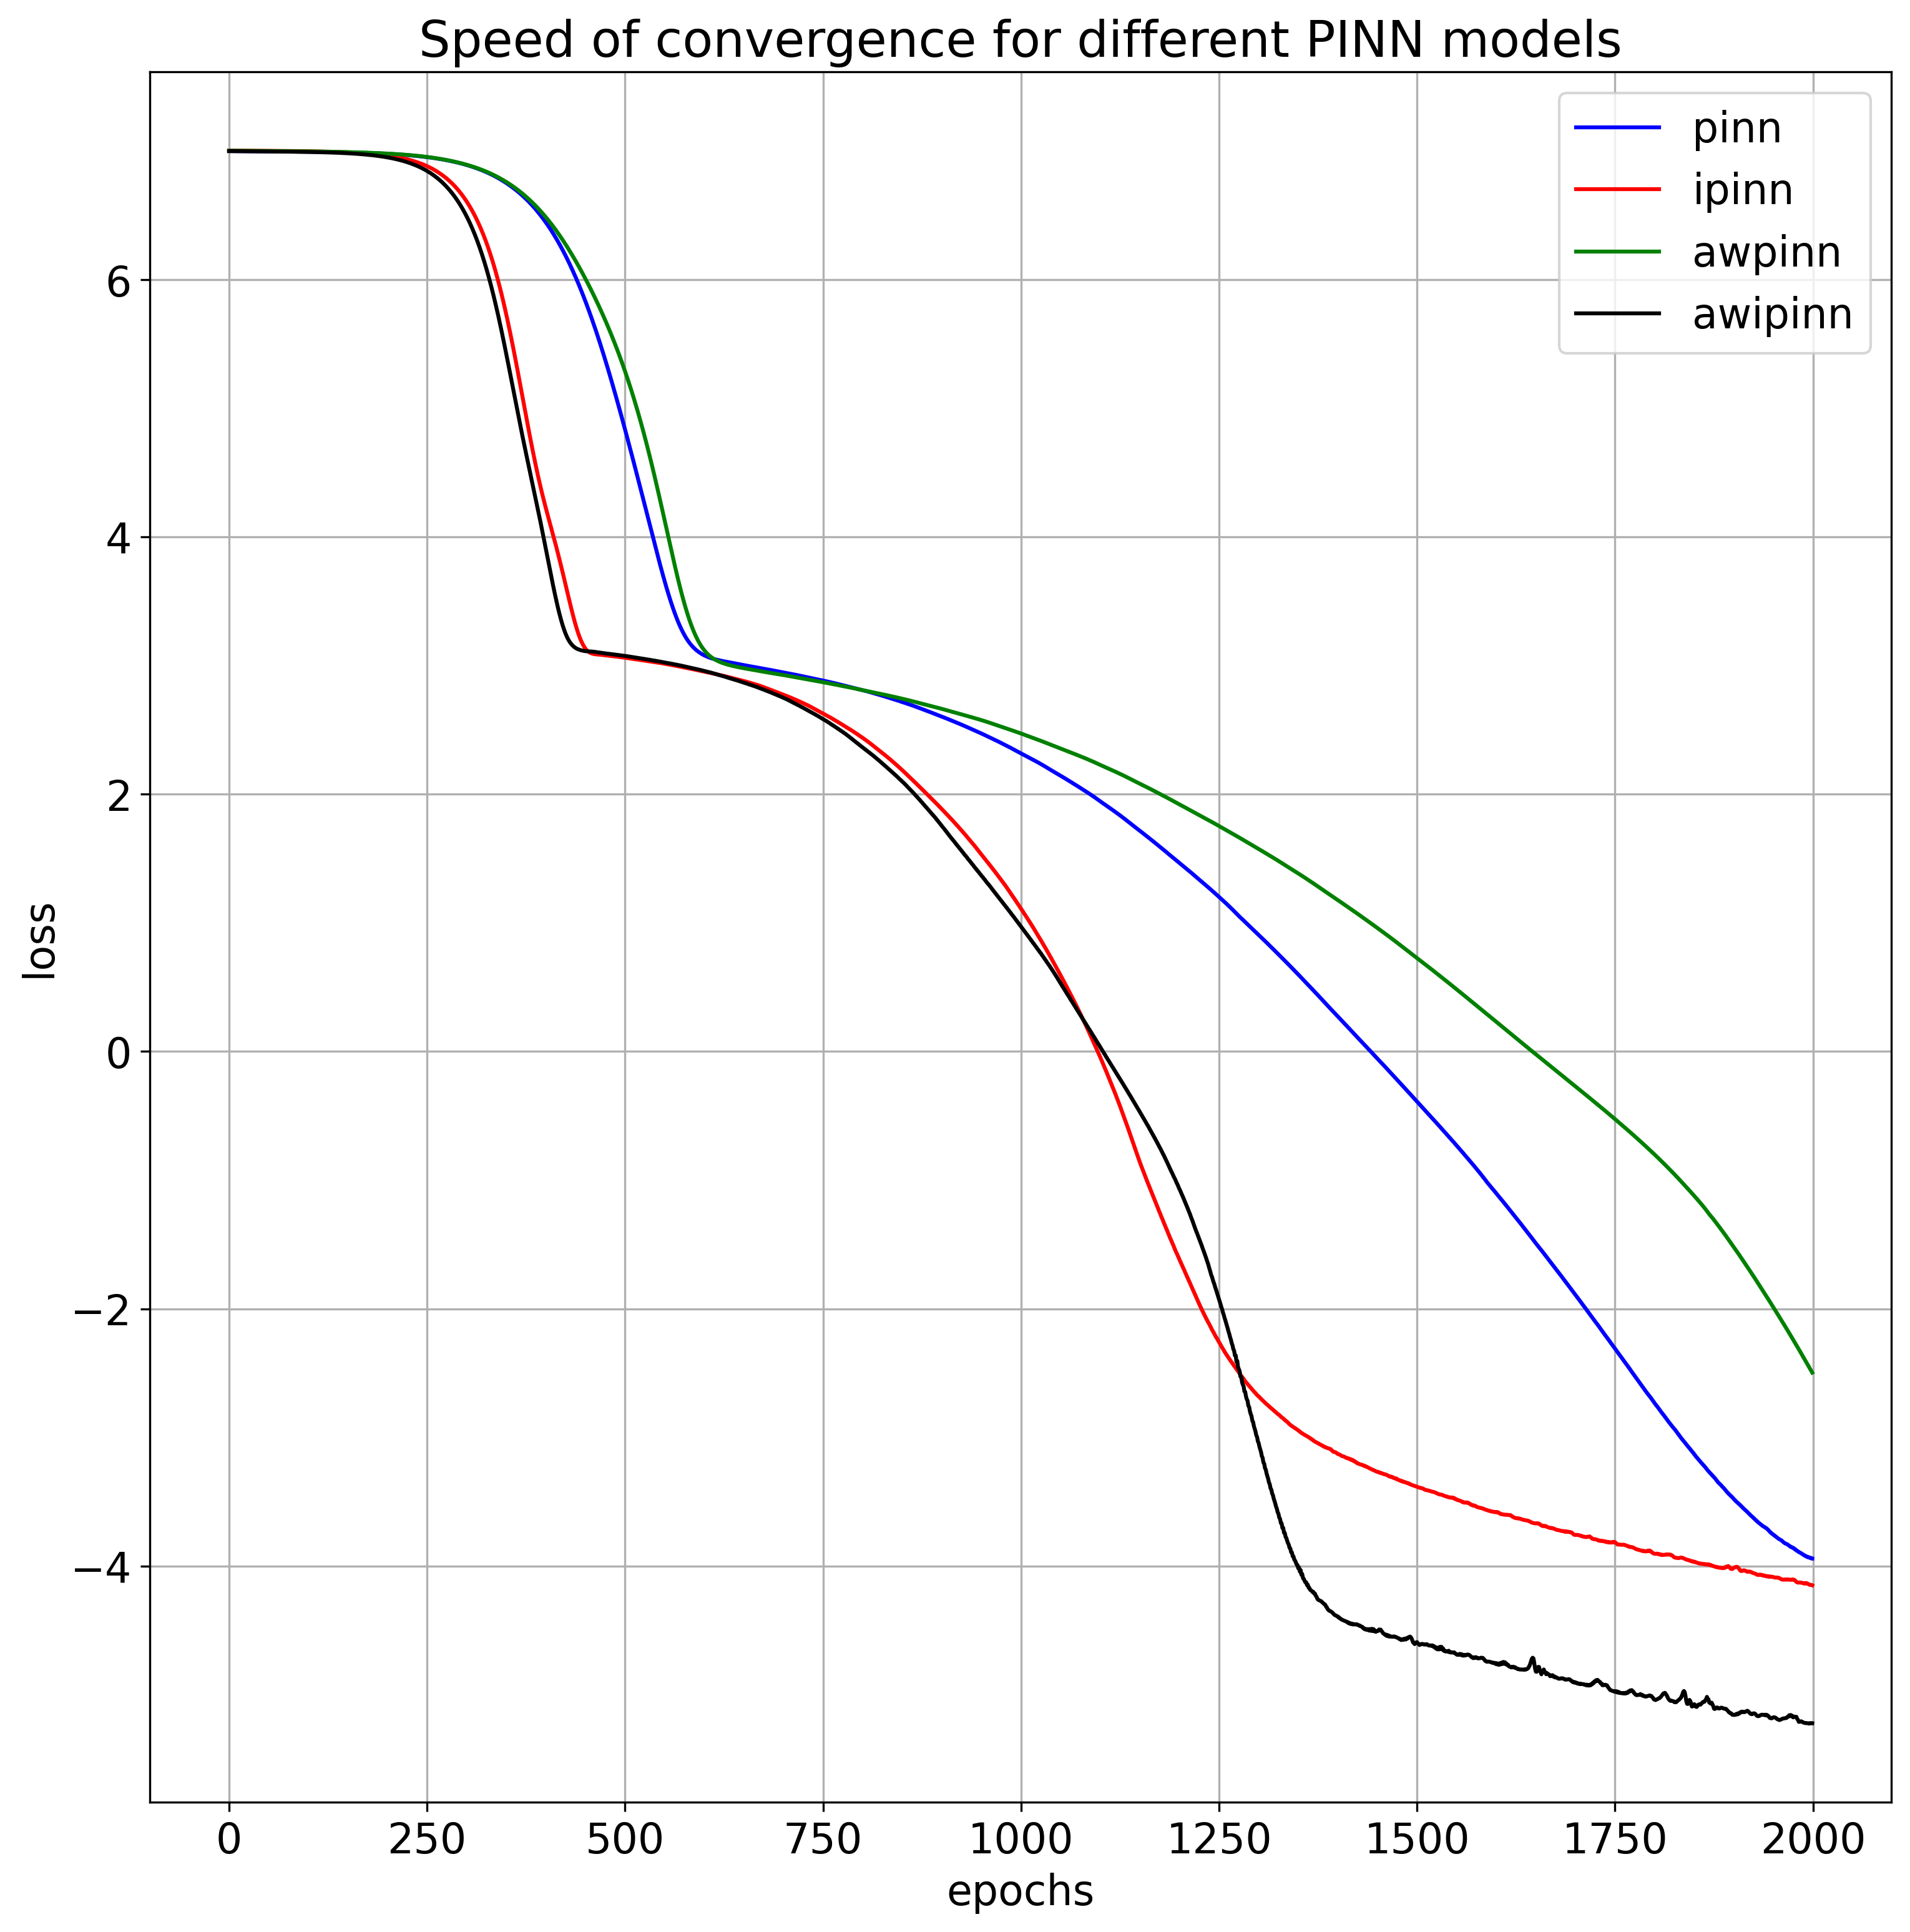

In [19]:
fig = plt.figure(figsize=(12,12))
plt.plot(range(2000), [np.log(item) for item in loss_list[:2000]], color='blue', label='pinn')
plt.plot(range(2000), [np.log(item) for item in loss_list2[:2000]], color='red', label='ipinn')
# plt.plot(range(2000), [np.log(item) for item in loss_list3[:2000]], color='cyan', label='awipinn2')
plt.plot(range(2000), [np.log(item) for item in loss_list4[:2000]], color='green', label='awpinn')
plt.plot(range(2000), [np.log(item) for item in loss_list5[:2000]], color='black', label='awipinn')
# plt.plot(range(1000), [np.log(item) for item in loss_list6[:1000]], color='cyan', label='fnn')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title(f'Speed of convergence for different PINN models')
plt.grid(True)

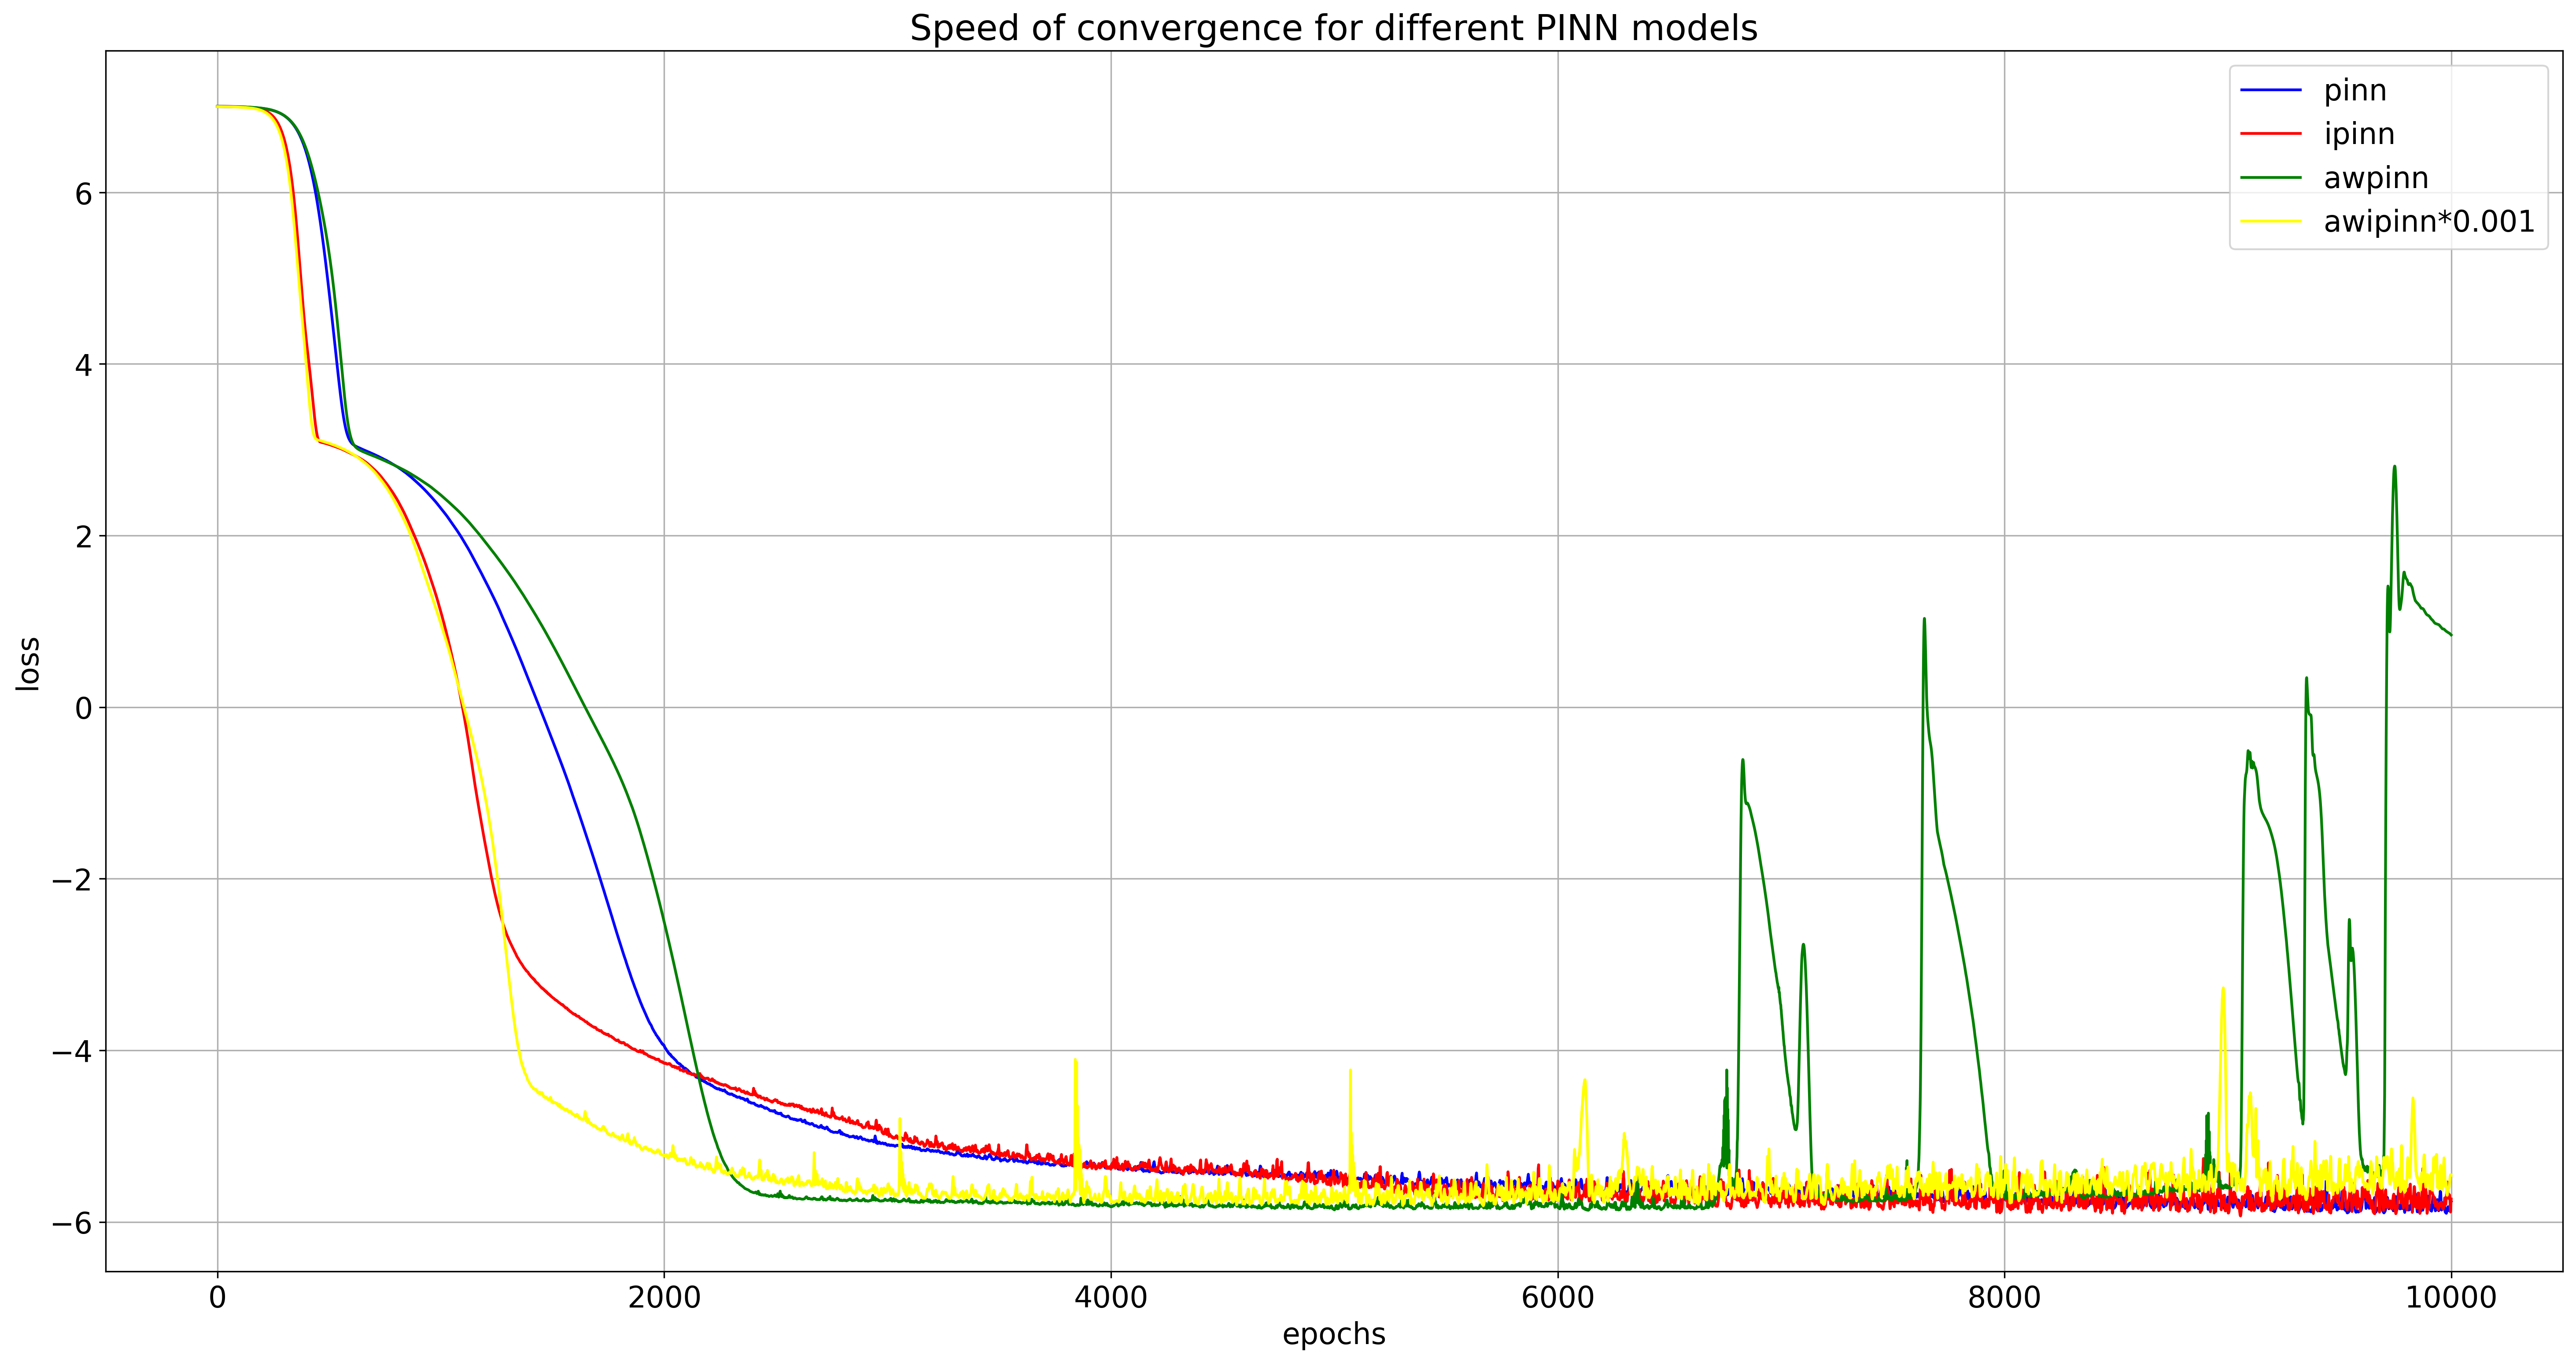

In [20]:
fig = plt.figure(figsize=(24,12))
plt.plot(range(10000), [np.log(item) for item in loss_list[:10000]], color='blue', label='pinn')
plt.plot(range(10000), [np.log(item) for item in loss_list2[:10000]], color='red', label='ipinn')
# plt.plot(range(10000), [np.log(item) for item in loss_list3[:10000]], color='cyan', label='awipinn*10')
plt.plot(range(10000), [np.log(item) for item in loss_list4[:10000]], color='green', label='awpinn')
plt.plot(range(10000), [np.log(item) for item in loss_list5[:10000]], color='yellow', label='awipinn*0.001')
# plt.plot(range(10000), [np.log(item) for item in loss_list6[:10000]], label='ipinn2')
# plt.plot(range(10000), [np.log(item) for item in loss_list6[:10000]], color='cyan', label='fnn')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title(f'Speed of convergence for different PINN models')
plt.grid(True)

In [ ]:
fig = plt.figure(figsize=(12,12))
plt.plot(range(7000), loss_list[3000:], color='blue', label='pinn')
plt.plot(range(7000), loss_list2[3000:], color='red', label='ipinn')
plt.plot(range(7000), loss_list4[3000:], color='green', label='awpinn')
plt.plot(range(7000), loss_list5[3000:], color='black', label='awipinn')
# plt.plot(range(17000), loss_list6[3000:], color='cyan', label='fnn')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title(f'training loss for different PINN models')
plt.grid(True)